<a href="https://colab.research.google.com/github/Stronglight0627/PilGi/blob/main/MNIST%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망을 사용한 이미지 분류

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/8-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

#수업시간에 배운 CNN을 이용하여 이미지를 분류해 보자!!!


데이터 셋 정보: http://yann.lecun.com/exdb/mnist/

## MNIST 데이터 셋 읽어오기

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

(train_input, train_target), (test_input, test_target) = keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


##로드한 데이터의 shape을 확인하시오 (샘플 수: 60000, 28 x 28).
##데이터 셋의 클래스 수를 확인하시오 (numpy unique() 활용 - 7일차 교육 MNIST 실습의 데이터 준비 슬라이드 참고)

In [3]:
print(train_input.shape)
print(np.unique(train_target, return_counts=True))

(60000, 28, 28)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


## 이미지에 깊이 1을 추가하고, 픽셀값을 0~1값으로 정규화하시오


In [4]:
#이미지 정규화 (전체 픽셀을 각각 255.0로 나눔)

train_scaled = train_input.reshape(-1, 28,28,1) / 255.0

##데이터 세트를 훈련데이터 (80%)와 검증세트로 분리하시오

In [5]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

#분류가 잘 되었는지 확인하시오 (훈련 세트 = 48000, 검증세트 = 10000)

In [6]:
#shape를 출력
print(train_scaled.shape, val_scaled.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1)


## matplotlib의 imshow() 메소드를 사용하여 정규화된 훈련세트의 5번째 인덱스의 이미지를 color bar와 함께 출력하시오. 

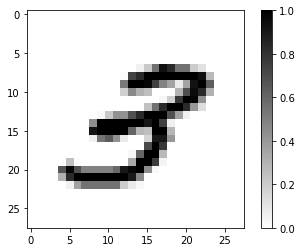

In [7]:
import matplotlib.pyplot as plt
plt.imshow(train_scaled[5].reshape(28,28), cmap="gray_r") #변수명은 변경 가능
plt.colorbar()
plt.show()

## 합성곱 신경망 만들기

In [8]:
model = keras.Sequential()

##첫번째 합성곱 층을 생성후 모델에 추가하시오.
필터 수: 32개\
필터 (커널) 사이즈: 3 x 3 x 1\
활성화 함수: ReLU\
패딩: same padding\
stride: 1\
input_shape는 데이터 특성에 맞게 지정

In [9]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

## 2x2 최대 풀링 (max pooling) 층을 추가하시오

In [10]:
model.add(keras.layers.MaxPooling2D(2))

##두번째 합성곱 층을 생성 후 모델에 추가하시오
필터 수: 64개\
필터 (커널) 사이즈: 3 x 3 x 32\
활성화 함수: ReLU\
패딩: same padding\
stride: 1

In [11]:
model.add(keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu',padding='same'))

## 2x2 최대 풀링 (max pooling) 층을 추가하시오.
stride: 2

In [12]:
model.add(keras.layers.MaxPooling2D(2))

## Flatten 층을 추가하고, 출력을 위한 Dense 층 두개를 추가하시오.
## Flatten 층과 첫번째 Dense 층 사이에 Dropout 층을 추가하시오 (Dropout율: 30%) 
첫번째 Dense 층의 뉴런 갯수: 100개\
첫번째 Dense 층의 활성화 함수: ReLU\
두번째 Dense 층의 뉴런 갯수: 데이터 특성에 맞게 설정\
두번째 Dense 층의 활성화 함수: Softmax


In [13]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10,activation='softmax'))

##model.summary()를 사용하여 모델이 잘 구성되었는지 확인

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

##utils.plot_model()을 사용하여 모델이 잘 구성되었는지 확인

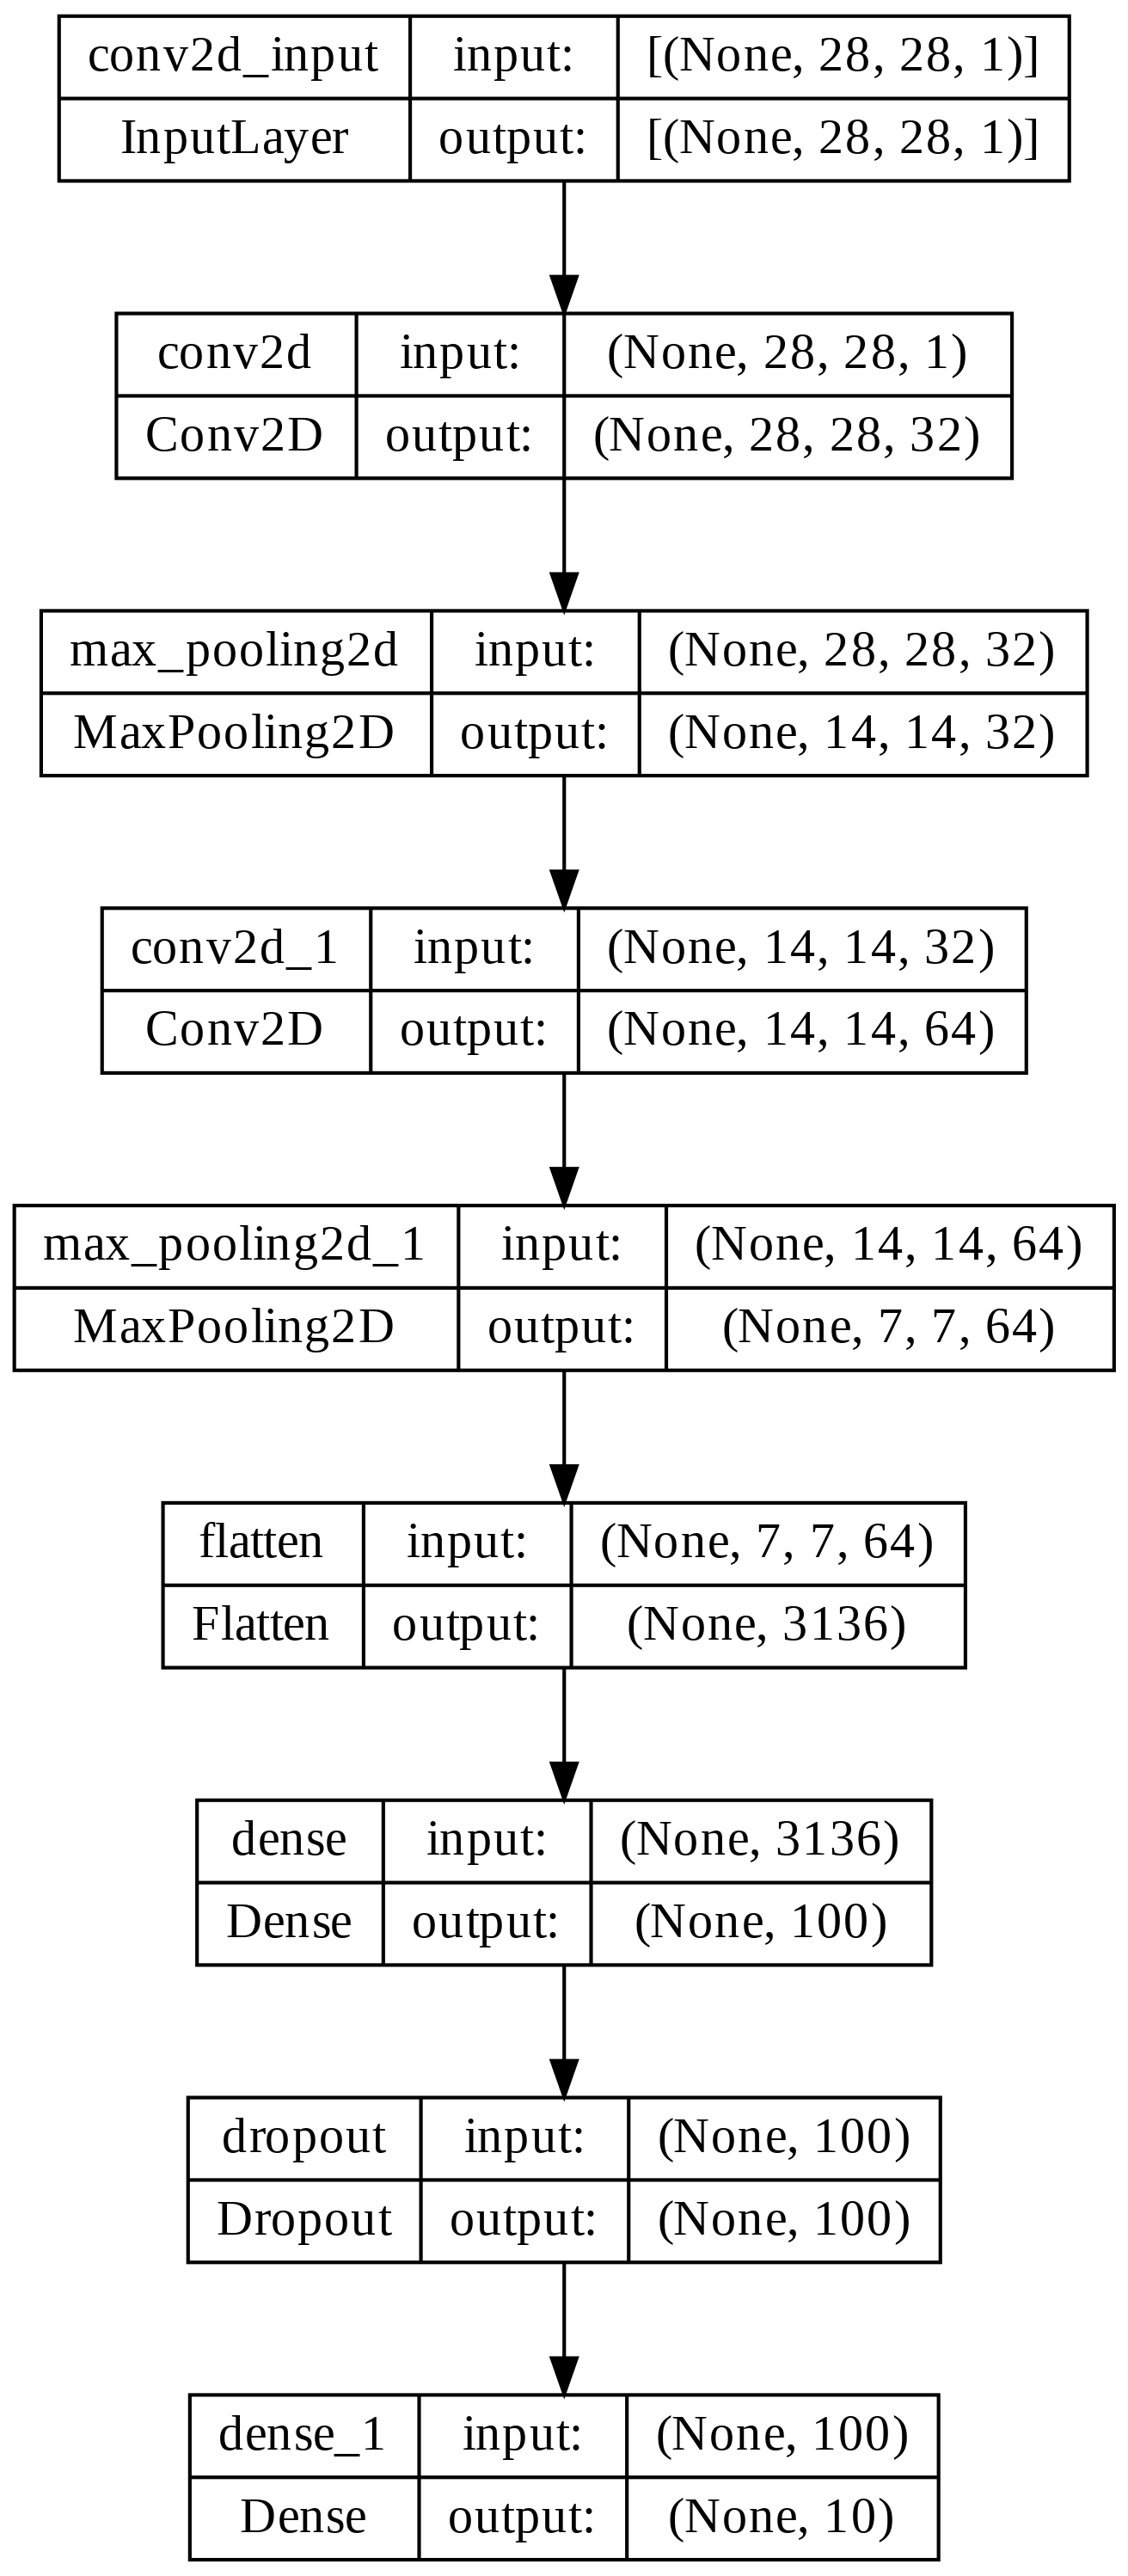

In [15]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn1.png', dpi=300)

## 모델 컴파일과 훈련
optimizer: adam\
손실함수: 다중분류를 위한 함수로 지정\
accuracy 메트릭 추가

In [16]:
#accuracy는 매개변수를 통해 별도 추가
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')

## ModelCheckPoint 콜백 및 Early_stopping 콜백 사용을 사용하여 최적의 모델을 찾고 저장하시오.
##에포크는 적당히 큰 값으로 설정 (예: 30)
## patience: 2

In [17]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=30, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/30
1500/1500 [==============================] - 72s 47ms/step - loss: 0.2015 - accuracy: 0.9362 - val_loss: 0.0503 - val_accuracy: 0.9848
Epoch 2/30
1500/1500 [==============================] - 69s 46ms/step - loss: 0.0707 - accuracy: 0.9782 - val_loss: 0.0414 - val_accuracy: 0.9871
Epoch 3/30
1500/1500 [==============================] - 69s 46ms/step - loss: 0.0516 - accuracy: 0.9840 - val_loss: 0.0400 - val_accuracy: 0.9888
Epoch 4/30
1500/1500 [==============================] - 69s 46ms/step - loss: 0.0393 - accuracy: 0.9881 - val_loss: 0.0412 - val_accuracy: 0.9887
Epoch 5/30
1500/1500 [==============================] - 68s 46ms/step - loss: 0.0334 - accuracy: 0.9894 - val_loss: 0.0348 - val_accuracy: 0.9895
Epoch 6/30
1500/1500 [==============================] - 68s 46ms/step - loss: 0.0274 - accuracy: 0.9911 - val_loss: 0.0339 - val_accuracy: 0.9890
Epoch 7/30
1500/1500 [==============================] - 68s 46ms/step - loss: 0.0241 - accuracy: 0.9920 - val_loss: 0.0380 -

## matplotlib를 사용하여 학습 세트와 검증세트의 Loss율을 확인하시오.

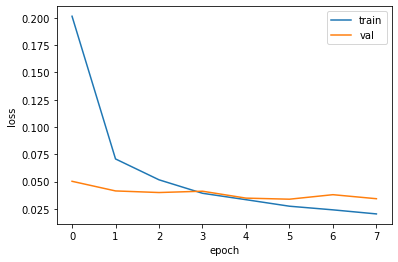

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## model.evaluate()를 사용하여 검증 세트에 대한 성능을 측정하시오

In [19]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 5s 14ms/step - loss: 0.0339 - accuracy: 0.9890


[0.03385903313755989, 0.9890000224113464]

##검증세트의 두번째 (인덱스 1) 이미지 출력

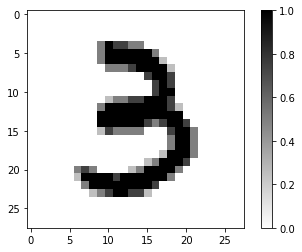

In [20]:
plt.imshow(val_scaled[1].reshape(28,28), cmap='gray_r')
plt.colorbar()
plt.show()

## 검증세트 두번째 (인덱스 1) 샘플의 예측결과를 확인

In [27]:
#predict()메소드를 사용하면 됩니다. 수업자료 참고
preds=model.predict(val_scaled[1:2]) #slicing은 배치차원을 유지시키기 위함
print(preds)

1/1 [==============================] - 0s 19ms/step
[[7.6722423e-15 6.1653502e-11 5.0316838e-12 9.9999988e-01 8.8226454e-16
  8.7878497e-08 5.8393340e-17 1.5831452e-11 2.0686472e-10 2.4405524e-09]]


## 위 예측결과를 그래프로 출력 후 확인

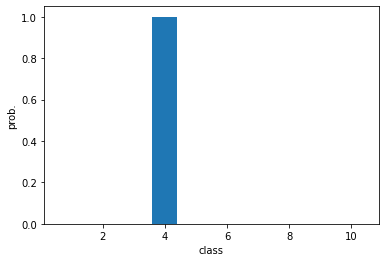

In [28]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [29]:
classes = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five',
           'Six', 'Seven', 'Eight', 'Nine']

In [30]:
import numpy as np
print(classes[np.argmax(preds)])

Three


##테스트 세트에 대한 성능을 평가해보자 (evaluate() 사용)

In [25]:
#테스트 데이터도 정규화가 필요합니다.
#성능평가시 evaluate()를 사용합니다.

test_scaled = test_input.reshape(-1,28,28,1) / 255.0
model.evaluate(test_scaled, test_target)


313/313 [==============================] - 4s 13ms/step - loss: 0.0275 - accuracy: 0.9912


[0.027530187740921974, 0.9911999702453613]